# Missing Data Analysis

## Objective
This notebook analyzes the extent and structure of missing data in the PHL Exoplanet Catalog.

### Scope
- Analysis is **restricted to the 30 approved features** listed in `README.md`.
- Focuses on missing value percentages and co-occurrence patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

### Load full dataset

In [2]:
file_path ="../datasets/full_data.csv"

try:
    df_full = pd.read_csv(file_path)
except FileNotFoundError:
    df_full = pd.read_csv('full_data.csv')

# The 30 approved features from README.md
approved_features = [
    'P_MASS', 'P_RADIUS', 'P_DENSITY', 'P_GRAVITY', 'P_ESCAPE', 'P_TYPE',
    'P_PERIOD', 'P_SEMI_MAJOR_AXIS', 'P_ECCENTRICITY', 'P_INCLINATION',
    'P_OMEGA', 'P_PERIASTRON', 'P_APASTRON', 'P_IMPACT_PARAMETER', 'P_HILL_SPHERE',
    'S_MASS', 'S_RADIUS', 'S_LUMINOSITY', 'S_TEMPERATURE', 'S_AGE',
    'S_METALLICITY', 'S_LOG_G', 'S_TYPE', 'S_MAG', 'S_DISC',
    'S_MAGNETIC_FIELD', 'S_SNOW_LINE', 'S_TIDAL_LOCK', 'P_DETECTION', 'P_DISTANCE'
]

# Filtering the dataframe
df = df_full[approved_features]
print(f"Dataset filtered to {df.shape[1]} features.")
df.head()

Dataset filtered to 30 features.


,P_MASS,P_RADIUS,P_DENSITY,P_GRAVITY,P_ESCAPE,P_TYPE,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,P_INCLINATION,...,S_METALLICITY,S_LOG_G,S_TYPE,S_MAG,S_DISC,S_MAGNETIC_FIELD,S_SNOW_LINE,S_TIDAL_LOCK,P_DETECTION,P_DISTANCE
0,6165.86330,NaN,NaN,NaN,NaN,Jovian,326.03000,1.29,0.231,NaN,...,-0.35,2.31,K0 III,4.740,NaN,NaN,34.529063,0.642400,Radial Velocity,1.324418
1,4684.78480,NaN,NaN,NaN,NaN,Jovian,516.21997,1.53,0.080,NaN,...,-0.02,1.93,K4 III,5.016,NaN,NaN,42.732816,0.648683,Radial Velocity,1.534896
2,1525.57440,NaN,NaN,NaN,NaN,Jovian,185.84000,0.83,0.000,NaN,...,-0.24,2.63,G8 III,5.227,NaN,NaN,20.593611,0.600010,Radial Velocity,0.830000
3,1481.07850,NaN,NaN,NaN,NaN,Jovian,1773.40000,2.93,0.370,NaN,...,0.41,4.45,K0 V,6.610,NaN,NaN,2.141648,0.445415,Radial Velocity,3.130558
4,565.73385,NaN,NaN,NaN,NaN,Jovian,798.50000,1.66,0.680,NaN,...,0.06,4.36,G2.5 V,6.250,NaN,NaN,3.019411,0.473325,Radial Velocity,2.043792


In [3]:
# Missing value summary (count + percentage)
missing_summary = pd.DataFrame({
    "Missing Count": df.isnull().sum(),
    "Missing Percentage (%)": (df.isnull().mean() * 100).round(2)
}).sort_values(by="Missing Percentage (%)", ascending=False)

missing_summary


,Missing Count,Missing Percentage (%)
S_MAGNETIC_FIELD,4048,100.00
S_DISC,4048,100.00
P_ESCAPE,3342,82.56
P_DENSITY,3342,82.56
P_GRAVITY,3342,82.56
P_OMEGA,3302,81.57
P_INCLINATION,3204,79.15
S_TYPE,2678,66.16
P_ECCENTRICITY,2668,65.91
P_IMPACT_PARAMETER,2639,65.19


### Visualizing Gaps

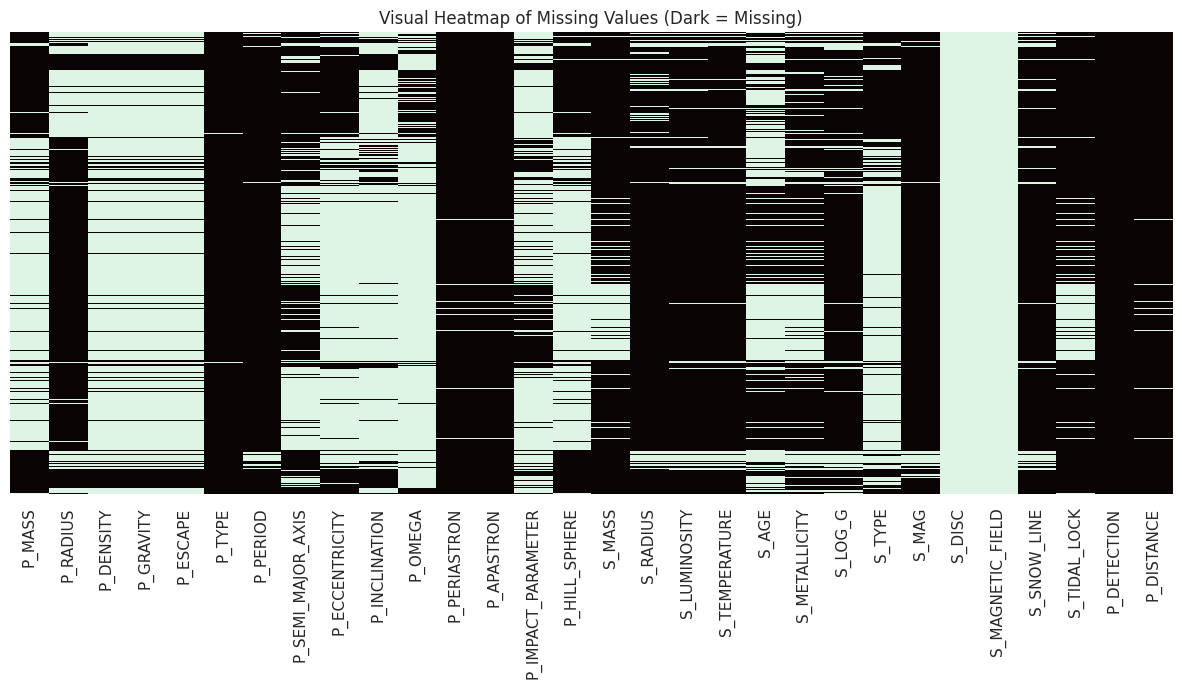

In [4]:
plt.figure(figsize=(15, 6))
sns.heatmap(
    df.isnull(),
    yticklabels=False,
    cbar=False,
    cmap="mako"
)
plt.title("Visual Heatmap of Missing Values (Dark = Missing)")
plt.show()


### Correlation of Missingness

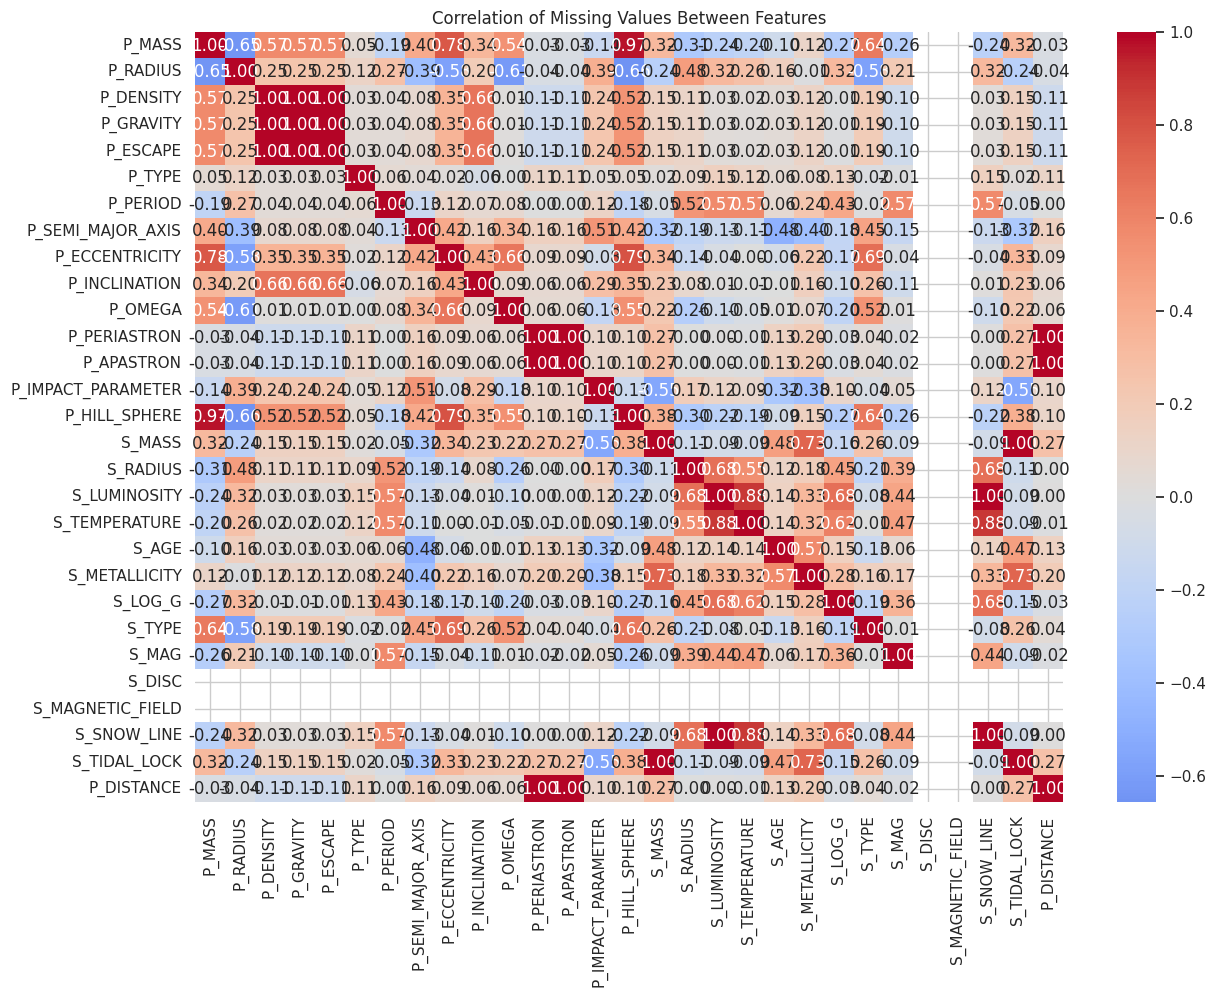

In [5]:
missing_corr = df.isnull().astype(int).corr()

cols_with_missing = df.columns[df.isnull().any()]

plt.figure(figsize=(14, 10))
sns.heatmap(
    missing_corr.loc[cols_with_missing, cols_with_missing],
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation of Missing Values Between Features")
plt.show()


### Summary of Findings

1. **Completely Missing Features:**  
   `S_DISC` and `S_MAGNETIC_FIELD` are entirely missing across the dataset, indicating unavailable or unrecorded stellar attributes.

2. **Linked Missingness:**  
   Planet physical properties such as Mass, Density, and Gravity frequently exhibit correlated missingness, suggesting shared measurement constraints.

3. **Modeling Implication:**  
   Features like `P_RADIUS` demonstrate higher completeness compared to `P_MASS`, making them more reliable candidates during initial modeling stages.
